# Time series ( Cocacola sales )

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 666A-2AE9

 Directory of C:\Users\nihaz\Documents\DS Assignments\Forecasting-main

02-04-2023  09:26    <DIR>          .
02-04-2023  09:24    <DIR>          ..
02-04-2023  09:26    <DIR>          .ipynb_checkpoints
02-04-2023  09:24             9,559 Airlines+Data.xlsx
02-04-2023  09:24             9,422 CocaCola_Sales_Rawdata.xlsx
02-04-2023  09:24               233 Problem_statement.txt
02-04-2023  09:24                13 README.md
02-04-2023  09:26           762,258 Time Forecasting( Airlines Passengers data ).ipynb
02-04-2023  09:24           253,078 Time series ( Cocacola sales ).ipynb
               6 File(s)      1,034,563 bytes
               3 Dir(s)  60,563,091,456 bytes free


In [3]:
print(open("Problem_statement.txt").read())

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.



In [4]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
data

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### EDA 

In [5]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


<AxesSubplot:>

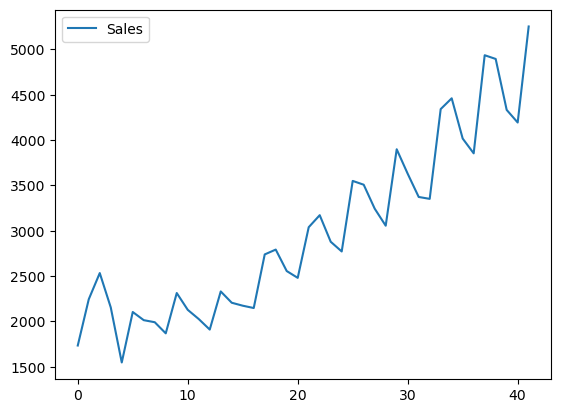

In [6]:
data.plot()

<AxesSubplot:>

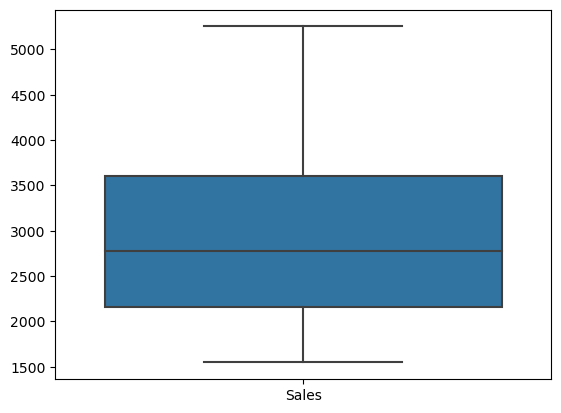

In [7]:
sns.boxplot(data=data)

array([[<AxesSubplot:title={'center':'Sales'}>]], dtype=object)

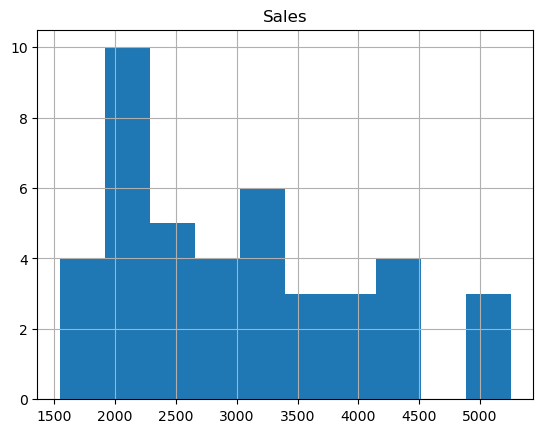

In [8]:
data.hist()

<AxesSubplot:ylabel='Density'>

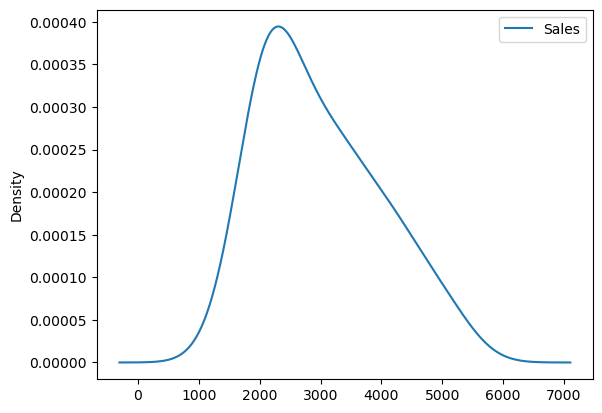

In [9]:
data.plot(kind="kde")


In [10]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data['Sales'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.309421
p-value                         0.996661
#Lags Used                      7.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


In [11]:
len(data)

42

In [12]:
data['quarter']=0
for i in range(42):
    n=data['Quarter'][i]
    data['quarter'][i]=n[0:2]

In [13]:
data

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [14]:
data['quarter'].value_counts()

Q1    11
Q2    11
Q3    10
Q4    10
Name: quarter, dtype: int64

#### Creating dummy columns

In [15]:
df_dummies=pd.DataFrame(pd.get_dummies(data['quarter']),columns=['Q1','Q2','Q3','Q4'])
cc=pd.concat([data,df_dummies],axis= 1)

In [16]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [17]:
cc['t'] = np.arange(1,43)
cc['t_squared'] = cc['t']**2
cc["Sales_log"] =np.log(data['Sales'])

In [18]:
cc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_squared,Sales_log
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [19]:
train =cc.head(32)
test =cc.tail(10)

#### Creating Models

In [20]:
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

#### Linear Model

In [21]:
linear_model =smf.ols("Sales~t",data =train).fit()
linear_pred = pd.Series(linear_model.predict(test['t']))
linear_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(linear_pred)))
linear_rmse

752.9233932767115

#### Quadratic Model

In [22]:
quad_model =smf.ols("Sales~t+t_squared",data=train).fit()
quad_pred = pd.Series(quad_model.predict(test[['t','t_squared']]))
quad_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(quad_pred)))
quad_rmse

457.73573554072897

#### Exponential model 

In [23]:
exp_model  =smf.ols("Sales_log~t",data=train).fit()
exp_pred =pd.Series(exp_model.predict(test['t']))
exp_rmse =np.sqrt(mean_squared_error(np.array(test['Sales']),np.array(exp_pred)))
exp_rmse

4387.940544839098

#### Table

In [24]:
dd = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,])}
table_rmse=pd.DataFrame(dd)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


In [25]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 666A-2AE9

 Directory of C:\Users\nihaz\Documents\DS Assignments\Forecasting-main

02-04-2023  09:26    <DIR>          .
02-04-2023  09:24    <DIR>          ..
02-04-2023  09:26    <DIR>          .ipynb_checkpoints
02-04-2023  09:24             9,559 Airlines+Data.xlsx
02-04-2023  09:24             9,422 CocaCola_Sales_Rawdata.xlsx
02-04-2023  09:24               233 Problem_statement.txt
02-04-2023  09:24                13 README.md
02-04-2023  09:26           762,258 Time Forecasting( Airlines Passengers data ).ipynb
02-04-2023  09:24           253,078 Time series ( Cocacola sales ).ipynb
               6 File(s)      1,034,563 bytes
               3 Dir(s)  60,562,956,288 bytes free


In [26]:
data = pd.read_excel("CocaCola_Sales_Rawdata.xlsx",header=0,index_col=0, parse_dates=True)
data.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [27]:
# separate out a validation dataset
split_point = len(data) - 10
dataset , validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 32, Validation 10


In [28]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

train

0
Q1_86    1734.827000
Q2_86    2244.960999
Q3_86    2533.804993
Q4_86    2154.962997
Q1_87    1547.818996
Q2_87    2104.411995
Q3_87    2014.362999
Q4_87    1991.746998
Q1_88    1869.049999
Q2_88    2313.631996
Q3_88    2128.320000
Q4_88    2026.828999
Q1_89    1910.603996
Q2_89    2331.164993
Q3_89    2206.549995
Q4_89    2173.967995
Q1_90    2148.278000
Q2_90    2739.307999
Q3_90    2792.753998
Q4_90    2556.009995
Q1_91    2480.973999
Q2_91    3039.522995
Q3_91    3172.115997
Q4_91    2879.000999
Q1_92    2772.000000
Q2_92    3550.000000
Q3_92    3508.000000
Q4_92    3243.859993
Q1_93    3056.000000
Q2_93    3899.000000
Q3_93    3629.000000
Q4_93    3373.000000
Name: 1, dtype: float64

In [29]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [30]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
RMSE: 387.510


In [31]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","RMSE_ARIMA"]),"RMSE_Values":pd.Series([linear_rmse,exp_rmse,quad_rmse,rmse])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,RMSE_ARIMA,387.510403
2,rmse_quad,457.735736
0,rmse_linear,752.923393
1,rmse_exp,4387.940545


### grid search ARIMA parameters for a time series

In [32]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA     #from statsmodels.tsa.arima_model import ARIMA  
from sklearn.metrics import mean_squared_error
from math import sqrt


# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### evaluate combinations of p, d and q values for an ARIMA model

In [33]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

#### load dataset

In [34]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
p_values = range(0, 10)
d_values = range(0, 10)
q_values = range(0, 10)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1067.042
ARIMA(0, 0, 1) RMSE=758.185
ARIMA(0, 0, 2) RMSE=469.891
ARIMA(0, 0, 3) RMSE=496.581
ARIMA(0, 0, 4) RMSE=447.208
ARIMA(0, 0, 5) RMSE=388.742
ARIMA(0, 0, 6) RMSE=390.050
Input contains NaN, infinity or a value too large for dtype('float64').
Input contains NaN, infinity or a value too large for dtype('float64').
Input contains NaN, infinity or a value too large for dtype('float64').
ARIMA(0, 1, 0) RMSE=472.258
ARIMA(0, 1, 1) RMSE=421.994
ARIMA(0, 1, 2) RMSE=423.073
ARIMA(0, 1, 3) RMSE=379.713
ARIMA(0, 1, 4) RMSE=244.751
ARIMA(0, 1, 5) RMSE=241.943
Input contains NaN, infinity or a value too large for dtype('float64').
Input contains NaN, infinity or a value too large for dtype('float64').
Input contains NaN, infinity or a value too large for dtype('float64').
Input contains NaN, infinity or a value too large for dtype('float64').
ARIMA(0, 2, 0) RMSE=737.992
ARIMA(0, 2, 1) RMSE=474.387
ARIMA(0, 2, 2) RMSE=376.800
ARIMA(0, 2, 3) RMSE=426.936
ARIMA(0, 2, 4) RMSE

Schur decomposition solver error.
ARIMA(2, 3, 0) RMSE=977.558
ARIMA(2, 3, 1) RMSE=594.761
ARIMA(2, 3, 2) RMSE=261859.143
ARIMA(2, 3, 3) RMSE=676.312
ARIMA(2, 3, 4) RMSE=417.321
ARIMA(2, 3, 5) RMSE=20959.847
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(2, 3, 9) RMSE=249.709
ARIMA(2, 4, 0) RMSE=1495.041
ARIMA(2, 4, 1) RMSE=996.935
ARIMA(2, 4, 2) RMSE=932.394
ARIMA(2, 4, 3) RMSE=726.186
ARIMA(2, 4, 4) RMSE=696.198
LU decomposition error.
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(2, 4, 9) RMSE=628.506
ARIMA(2, 5, 0) RMSE=2360.465
ARIMA(2, 5, 1) RMSE=1522.936
ARIMA(2, 5, 2) RMSE=1468.546
ARIMA(2, 5, 3) RMSE=1055.306
ARIMA(2, 5, 4) RMSE=1027.828
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(2, 5, 9) RMSE=852.513
ARIMA(2, 6, 0) RMSE=3652.686
ARIMA(2, 6, 1) RMSE=2406.430
L

ARIMA(4, 9, 9) RMSE=4194.695
ARIMA(5, 0, 0) RMSE=185.003
ARIMA(5, 0, 1) RMSE=197.695
ARIMA(5, 0, 2) RMSE=211.660
ARIMA(5, 0, 3) RMSE=245.875
LU decomposition error.
LU decomposition error.
LU decomposition error.
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(5, 1, 0) RMSE=168.255
ARIMA(5, 1, 1) RMSE=163.947
ARIMA(5, 1, 2) RMSE=153.746
ARIMA(5, 1, 3) RMSE=179.489
ARIMA(5, 1, 4) RMSE=2634.161
LU decomposition error.
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(5, 2, 0) RMSE=173.793
ARIMA(5, 2, 1) RMSE=160.253
ARIMA(5, 2, 2) RMSE=158.930
ARIMA(5, 2, 3) RMSE=4762643.097
ARIMA(5, 2, 4) RMSE=1346.752
ARIMA(5, 2, 5) RMSE=139.199
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
LU decomposition error.
LU decomposition error.
LU decomposition error.
LU 

Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(7, 7, 8) RMSE=1015.347
ARIMA(7, 7, 9) RMSE=986.210
ARIMA(7, 8, 0) RMSE=770663657.580
ARIMA(7, 8, 1) RMSE=17814284824.433
ARIMA(7, 8, 2) RMSE=515.420
LU decomposition error.
ARIMA(7, 8, 4) RMSE=19673204313.063
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(7, 8, 8) RMSE=1689.004
ARIMA(7, 8, 9) RMSE=1678.070
ARIMA(7, 9, 0) RMSE=14366357893.688
ARIMA(7, 9, 1) RMSE=11144294192.692
ARIMA(7, 9, 2) RMSE=994.421
LU decomposition error.
Schur decomposition solver error.
Schur decomposition solver error.
Schur decomposition solver error.
ARIMA(7, 9, 7) RMSE=2535.058
ARIMA(7, 9, 8) RMSE=2621.660
ARIMA(7, 9, 9) RMSE=2373.537
ARIMA(8, 0, 0) RMSE=168.868
ARIMA(8, 0, 1) RMSE=222.452
ARIMA(8, 0, 2) RMSE=203.767
ARIMA(8, 0, 3) RMSE=278.397
LU decomposition error.
LU decomposition error.
LU decomposition error.
Schur decomposition solver

Best ARIMA(4, 0, 6) RMSE=101.272

In [45]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA

In [46]:
# load data
train = read_csv('dataset.csv', index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [47]:
train

,1734.8269996643066
Q1_86,
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999
Q2_88,2313.631996


In [48]:
len(X),X

(31,
 array([[2244.961 ],
        [2533.805 ],
        [2154.963 ],
        [1547.819 ],
        [2104.412 ],
        [2014.363 ],
        [1991.747 ],
        [1869.05  ],
        [2313.632 ],
        [2128.32  ],
        [2026.829 ],
        [1910.604 ],
        [2331.165 ],
        [2206.55  ],
        [2173.968 ],
        [2148.278 ],
        [2739.308 ],
        [2792.754 ],
        [2556.01  ],
        [2480.9739],
        [3039.523 ],
        [3172.116 ],
        [2879.001 ],
        [2772.    ],
        [3550.    ],
        [3508.    ],
        [3243.86  ],
        [3056.    ],
        [3899.    ],
        [3629.    ],
        [3373.    ]], dtype=float32))

In [49]:
train.values

array([[2244.96099854],
       [2533.80499268],
       [2154.96299744],
       [1547.81899643],
       [2104.41199493],
       [2014.36299896],
       [1991.74699783],
       [1869.04999924],
       [2313.63199615],
       [2128.31999969],
       [2026.82899857],
       [1910.60399628],
       [2331.16499329],
       [2206.54999542],
       [2173.96799469],
       [2148.27799988],
       [2739.30799866],
       [2792.7539978 ],
       [2556.00999451],
       [2480.97399902],
       [3039.522995  ],
       [3172.11599731],
       [2879.00099945],
       [2772.        ],
       [3550.        ],
       [3508.        ],
       [3243.85999298],
       [3056.        ],
       [3899.        ],
       [3629.        ],
       [3373.        ]])

In [53]:
# fit model
model = ARIMA(train.values, order=(4,0,6))
model_fit = model.fit()

In [54]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   31
Model:                 ARIMA(4, 0, 6)   Log Likelihood                -204.733
Date:                Sun, 02 Apr 2023   AIC                            433.467
Time:                        10:14:30   BIC                            450.675
Sample:                             0   HQIC                           439.076
                                 - 31                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2593.2796    958.010      2.707      0.007     715.614    4470.945
ar.L1         -0.1480      0.228     -0.650      0.516      -0.594       0.298
ar.L2          0.0318      0.226      0.141      0.888      -0.410       0.474
ar.L3          0.0500      0.199      0.251      0.802      -0.341       0.441
ar.L4          0.8684      0.140      6.208      0.000       0.594       1.143
ma.L1          1.1145      1.027      1.085      0.278      -0.898       3.127
ma.L2          0.7524      0.852      0.883      0.377      -0.917       2.422
ma.L3          0.7514      1.048      0.717      0.473      -1.303       2.806
ma.L4          0.8882      0.897      0.990      0.322      -0.870       2.646
ma.L5          0.6695      0.894      0.749      0.454      -1.082       2.421
ma.L6         -0.0548      0.504     -0.109      0.913      -1.042       0.932
sigma2      2.887e+04   2.48e+04      1.166      0.244   -1.97e+04    7.74e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.96   Prob(JB):                         0.42
Heteroskedasticity (H):               0.57   Skew:                            -0.57
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
forecast=model_fit.forecast(steps=10)[0]

In [56]:
model_fit.get_forecast()

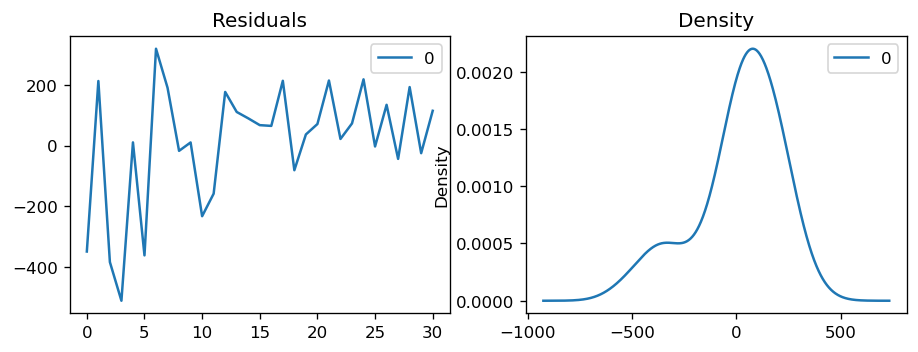

In [57]:
# Plotting Residual Errors
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  

myresiduals = pd.DataFrame(model_fit.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  